In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [ ]:
#Congigs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [ ]:
#Load dataset
df = pd.read_csv("./data/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Assign the independent variable to x
x = df['thal']
x_ = np.array(x).reshape(-1, 1)

In [ ]:
#Count values of "thal"
df['thal'].value_counts()

2    166
3    117
1     20
Name: thal, dtype: int64

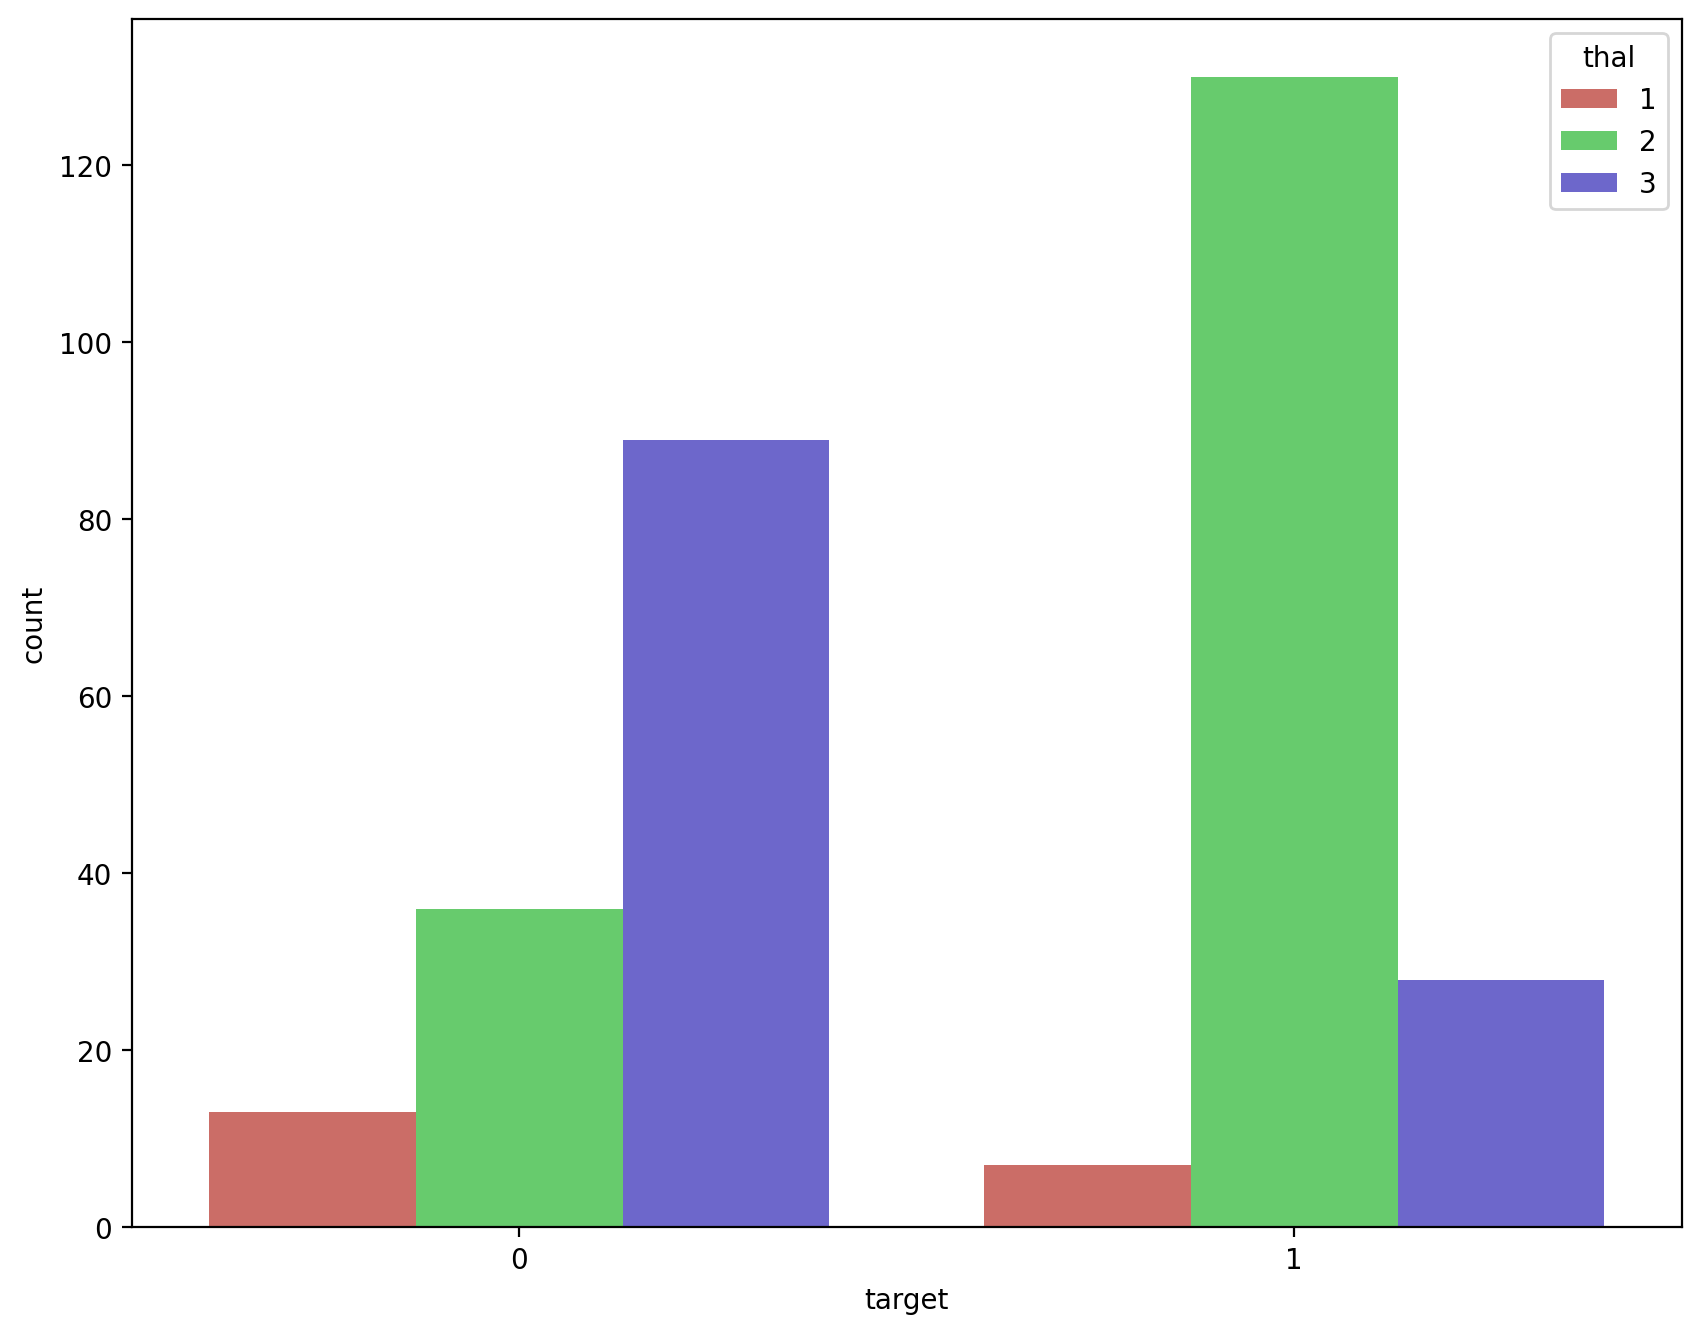

In [ ]:
#Visualize values of "thal" and "target"
sns.countplot(x='target', hue='thal', data=df, palette='hls')
plt.show()

In [ ]:
#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(x_, df.target, test_size=0.3, random_state=0)

In [ ]:
#Create model
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
#Get results
intercept = model.intercept_
coefs = model.coef_
print('Intercept:', intercept)
print('Coef:', coefs)

Intercept: [2.71054627]
Coef: [[-1.07582551]]


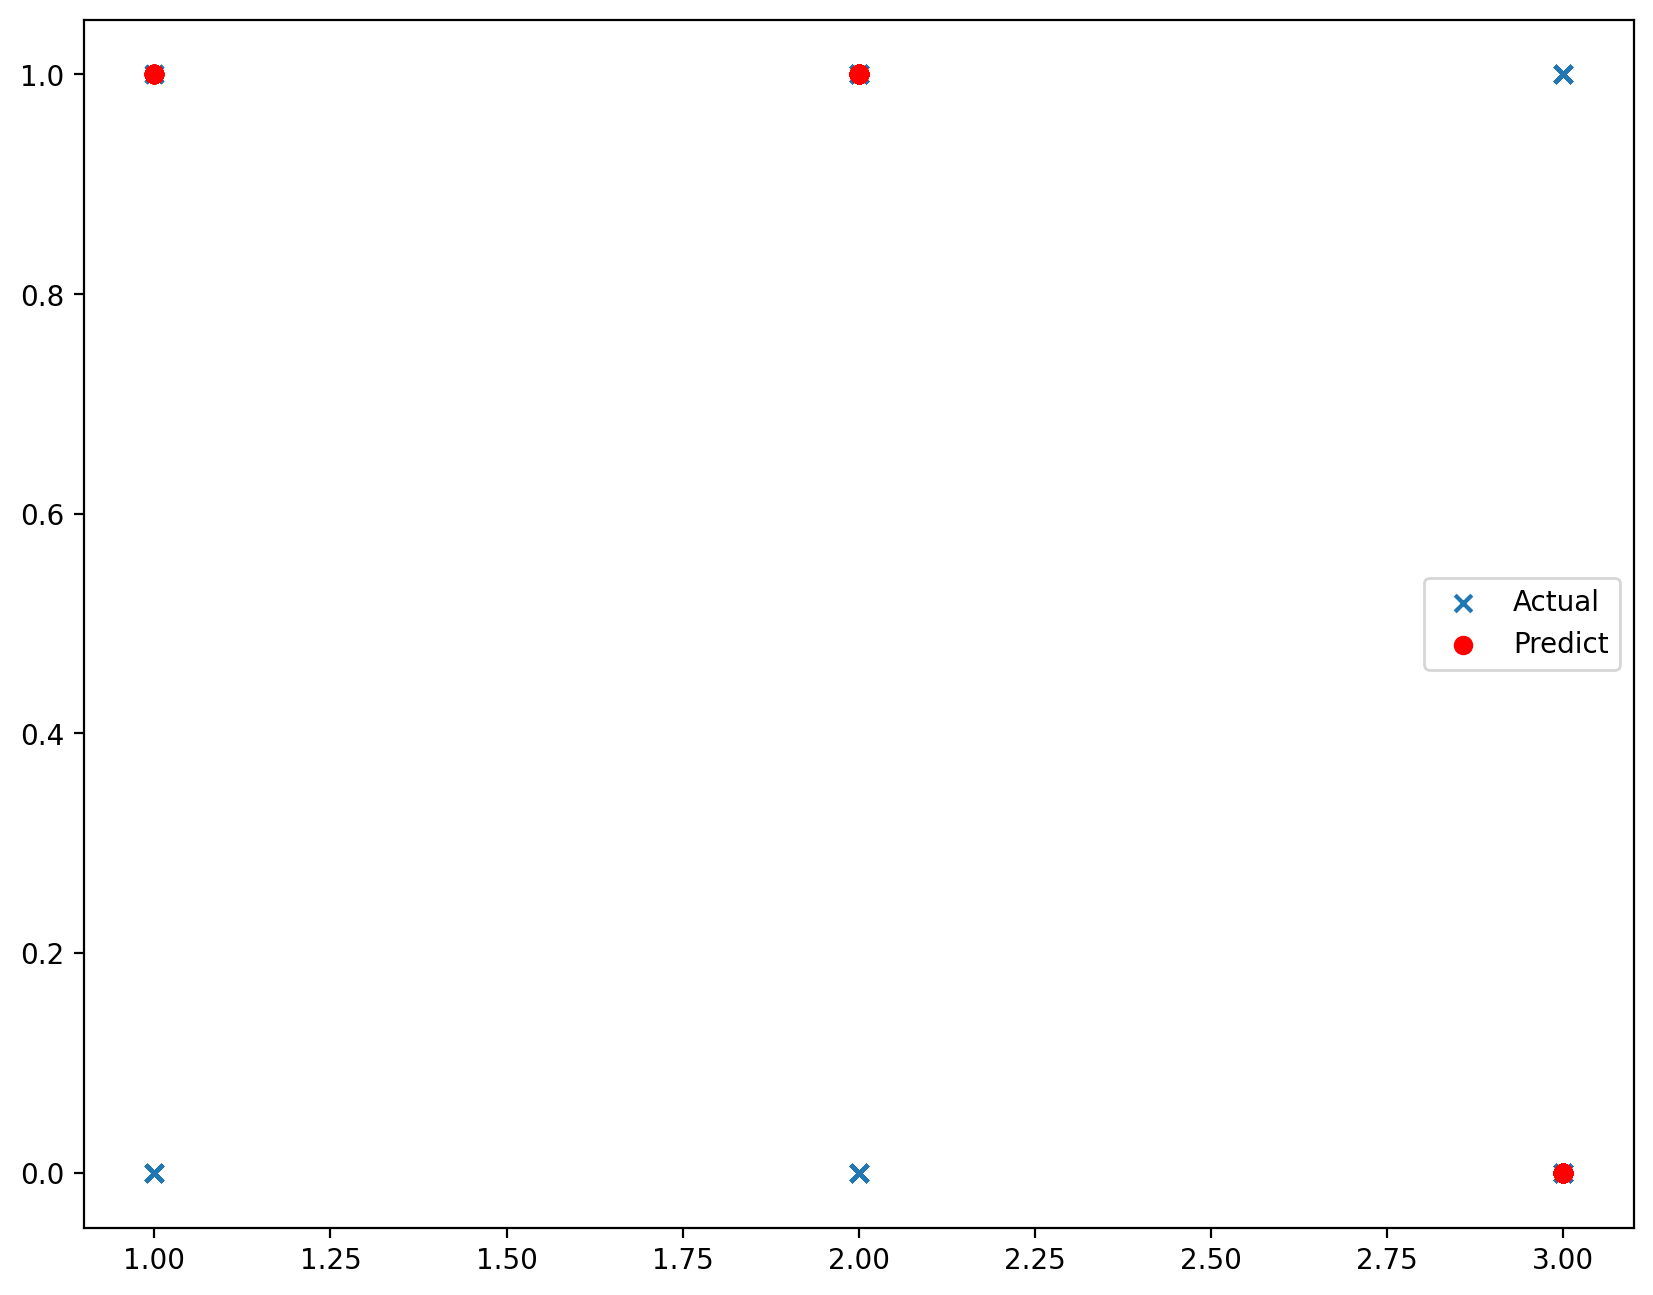

In [ ]:
#Visualization
y_pred = model.predict(X_train)
plt.scatter(X_train, y_train, marker='x',label='Actual')
plt.scatter(X_train, y_pred, color='red',marker='o', label='Predict')
plt.legend()
plt.show()

In [ ]:
#Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
#Actual value and predicted value
new = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
new.head(10)

,Actual value,Predicted value
225,0,0
152,1,0
228,0,0
201,0,0
52,1,0
245,0,0
175,0,0
168,0,0
223,0,0
217,0,0


In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[29, 15],
       [10, 37]])

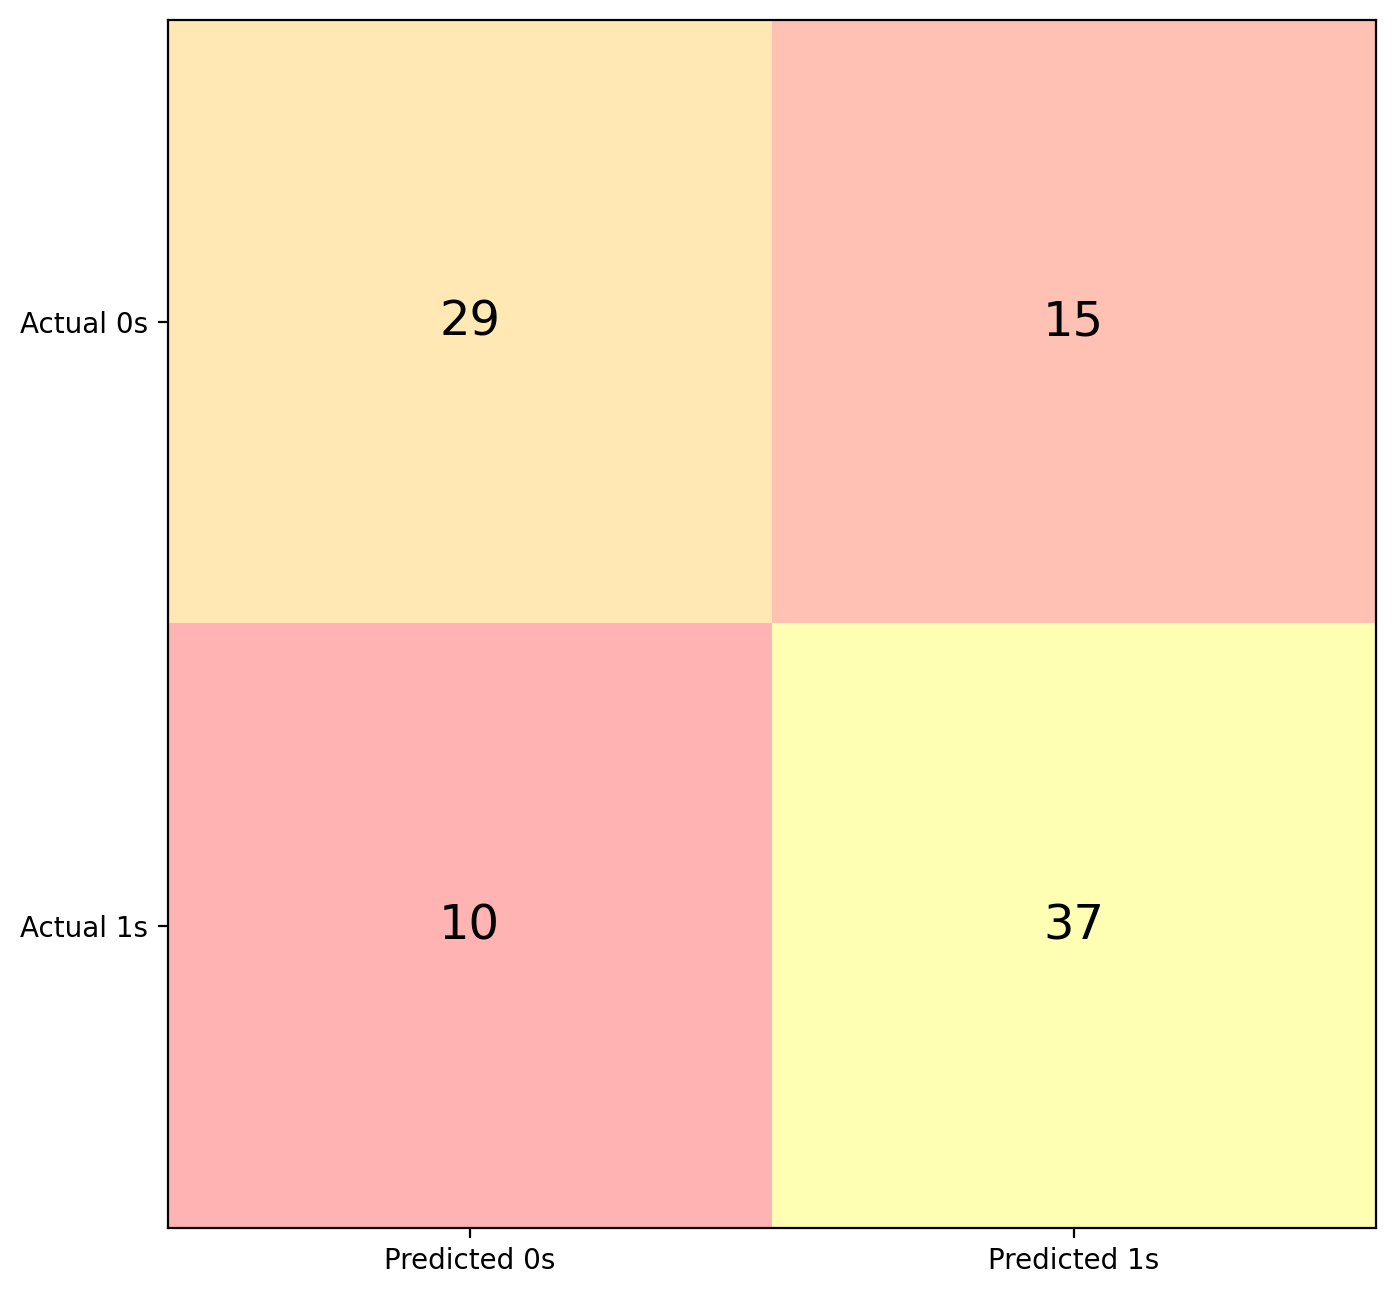

In [ ]:
#Visualize confusion matrix
fig, ax = plt.subplots()
ax.imshow(cnf_matrix, cmap=plt.cm.autumn, alpha=0.3)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range (2):
    for j in range (2):
        ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.show()

In [ ]:
#Evaluation metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70        44
           1       0.71      0.79      0.75        47

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91

